In [43]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import os

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 9
mpl.rcParams["axes.titlesize"] = 9
mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 8
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [44]:
def most_resonant(cat):
    cats = {"bat":[15, 56, 61, 65, 68, 72, 107, 134, 159, 166, 177, 180, 181, 185, 114],
            "pol":[0, 35, 39, 80, 115, 122, 161, 163],
            "pri":[9, 31, 44, 87, 95, 164, 169, 194],
            "art":[19, 40, 49, 72, 81, 97, 117, 149],
            "oth":[12, 41, 50, 136, 153]}
    dates = {}
    df = pd.read_csv(os.path.join(ROOT_DIR,"results_05","All_Results.csv"), parse_dates=["Date"], index_col="Date")
    dq = df.filter(["Topic"])
    dq = pd.get_dummies(dq, columns=['Topic'])
    dq = dq.resample("D").sum()
    for i in cats[cat]:
        dfq = df.query(f"Topic == {i}")
        dfq = dfq.sort_values(by="Resonance",ascending=False)
        dates[i]=(str(dfq.index.tolist()[0])[:10])
    
    return dates

/var/folders/xd/g9cbpcws3m14495hf_1bxjyh0000gn/T/ipykernel_69653/3733268813.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(h.T + 1), origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='viridis', aspect='equal')


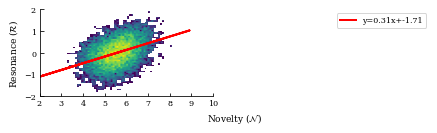

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

def density_plot_regression(df, figsize=(7, 7), bins=100):
    x = df['Novelty']
    y = df['Resonance']

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope*x + intercept

    fig, ax = plt.subplots(figsize=figsize)
    h, x_edges, y_edges = np.histogram2d(x, y, bins=bins)
    h = np.ma.array(h, mask=(h==0))
    plt.imshow(np.log10(h.T + 1), origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='viridis', aspect='equal')
    ax.plot(x, line, color='red', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
    ax.set_xlabel('Novelty')
    ax.set_ylabel('Resonance')

    # X axis
    ax.set_xlabel("Novelty ($\mathcal{N}$)")
    ax.set_xlim(2, 10)  # X axis scale
    ax.set_xticks([2,3, 4, 5, 6, 7, 8, 9, 10])  # Numbers of interest axis
    ax.xaxis.set_ticks_position("bottom")  # Ticks at the bottom
    ax.spines["bottom"].set_bounds(2, 10)  # Limits axis
    ax.spines["top"].set_visible(False)  # Hide upper axis

    # Y axis
    ax.set_ylabel("Resonance ($\mathcal{R}}$)")
    ax.set_ylim(-2, 2)  # Y axis scale
    ax.set_yticks([-2, -1, 0, 1, 2])  # Numbers of interest axis
    ax.yaxis.set_ticks_position("left")  # Ticks on the left
    ax.spines["left"].set_bounds(-2, 2)  # Limits axis
    ax.spines["right"].set_visible(False)  # Hide right axis

    ax.legend()
    plt.show()

df = pd.read_csv(os.path.join(ROOT_DIR,"results_05","All_Results.csv"), parse_dates=["Date"], index_col="Date")
df = df.query("Source == 'Reuters'")
df = df.filter(["Novelty","Resonance"])

density_plot_regression(df)
